# Comparación de Modelos: Wikipedia vs. Twitter

En esta práctica, vamos a descargar dos modelos GloVe diferentes para ver cómo el **contexto de entrenamiento** afecta el significado matemático de las palabras.

1.  **Glove-wiki-gigaword-50:** Entrenado en textos formales y noticias.
2.  **Glove-twitter-50:** Entrenado en tuits (lenguaje informal, abreviaciones, emojis).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns # Opcional, para estética
# formato svg para figuras
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

## Ejercicio 1: Descargar e inspeccionar los modelos

Cargamos ambos modelos en memoria. Ten en cuenta que esto puede consumir algo de RAM. Luego, inspeccionamos las dimensiones de sus matrices.

In [2]:
# NOTA: Si obtienes errores al importar, ejecuta la siguiente línea !pip...,
# luego reinicia tu sesión y comenta la línea.
!pip install gensim

import gensim.downloader as api

# Descargar los modelos de Wikipedia y Twitter
print("Cargando modelo Wikipedia...")
wiki = api.load('glove-wiki-gigaword-50')
print("Cargando modelo Twitter...")
twit = api.load('glove-twitter-50')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 85.7 MB/s eta 0:00:00
Cargando modelo Wikipedia...
[==================================================] 100.0% 66.0/66.0MB downloaded
Cargando modelo Twitter...
[==================================================] 100.0% 199.5/199.5MB downloaded


In [3]:
# Dimensiones de la matriz de embeddings
# shape[0] es el número de palabras, shape[1] son las dimensiones (50)
print(f'El modelo Wikipedia tiene {wiki.vectors.shape[0]} palabras y {wiki.vectors.shape[1]} dimensiones de embedding.')
print(f'El modelo Twitter tiene {twit.vectors.shape[0]} palabras y {twit.vectors.shape[1]} dimensiones de embedding.')

El modelo Wikipedia tiene 400000 palabras y 50 dimensiones de embedding.
El modelo Twitter tiene 1193514 palabras y 50 dimensiones de embedding.


## Ejercicio 2: Visualizar los embeddings de una palabra

Vamos a elegir una palabra común, como "table" (mesa), y graficar sus 50 valores numéricos para ambos modelos.
* **Gráfico Izquierdo:** Muestra los valores crudos del vector (dimensión por dimensión).
* **Gráfico Derecho:** Compara valor contra valor. Si los modelos fueran idénticos, veríamos una línea diagonal perfecta.

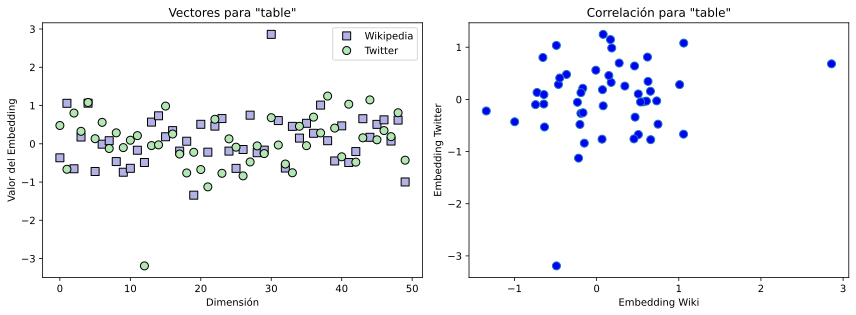

In [4]:
targetword = 'table'

fig, axs = plt.subplots(1, 2, figsize=(12, 4.5))

# Gráfico de líneas/puntos por dimensión
axs[0].plot(wiki[targetword], 'ks', markerfacecolor=[.7, .7, .9], markersize=8, label='Wikipedia')
axs[0].plot(twit[targetword], 'ko', markerfacecolor=[.7, .9, .7], markersize=8, label='Twitter')
axs[0].set(xlabel='Dimensión', ylabel='Valor del Embedding', title=f'Vectores para "{targetword}"')
axs[0].legend()

# Gráfico de dispersión (Wiki vs Twitter)
axs[1].plot(wiki[targetword], twit[targetword], 'o', markerfacecolor='b', markersize=8)
axs[1].set(xlabel='Embedding Wiki', ylabel='Embedding Twitter', title=f'Correlación para "{targetword}"')

plt.tight_layout()
plt.show()

## Ejercicio 3: Pares de palabras dentro de cada modelo

¿Cómo se relacionan "mesa" y "silla" en Wikipedia frente a Twitter?
Aquí graficamos el vector de "table" (eje X) contra el vector de "chair" (eje Y) para cada modelo por separado.



Observa la **Similitud Coseno** en el título de cada gráfico.

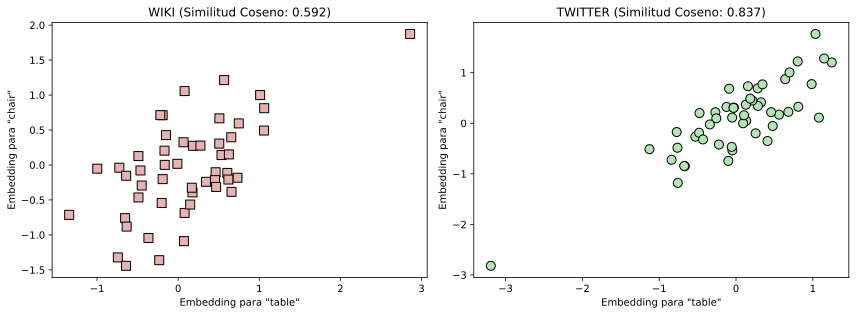

In [5]:
# Par de palabras
word1 = 'table'
word2 = 'chair'

fig, axs = plt.subplots(1, 2, figsize=(12, 4.5))

# --- Plot para Wiki ---
# Graficamos dimensión contra dimensión de las dos palabras
axs[0].plot(wiki[word1], wiki[word2], 'ks', markersize=9, markerfacecolor=[.9, .7, .7])
sim_wiki = wiki.similarity(word1, word2)
axs[0].set(xlabel=f'Embedding para "{word1}"', ylabel=f'Embedding para "{word2}"',
           title=f'WIKI (Similitud Coseno: {sim_wiki:.3f})')

# --- Plot para Twitter ---
axs[1].plot(twit[word1], twit[word2], 'ko', markersize=9, markerfacecolor=[.7, .9, .7])
sim_twit = twit.similarity(word1, word2)
axs[1].set(xlabel=f'Embedding para "{word1}"', ylabel=f'Embedding para "{word2}"',
           title=f'TWITTER (Similitud Coseno: {sim_twit:.3f})')

plt.tight_layout()
plt.show()

## Ejercicio 4: Palabras Similares

Buscamos los vecinos más cercanos a la palabra "battery".
* En **Wikipedia**, esperamos contextos más técnicos o generales.
* En **Twitter**, podríamos encontrar contextos relacionados con teléfonos (quedarse sin batería) o crímenes (assault/battery), dependiendo de lo que hable la gente.

In [6]:
print('10 palabras más similares a "battery" en Wiki:')
display(wiki.most_similar('battery', topn=10))

print('\nY en Twitter:')
display(twit.most_similar('battery', topn=10))

10 palabras más similares a "battery" en Wiki:


[('batteries', 0.8322107195854187),
 ('rechargeable', 0.7258116602897644),
 ('lithium-ion', 0.7082582116127014),
 ('weapon', 0.6928435564041138),
 ('machine', 0.6787962913513184),
 ('lead-acid', 0.6765270233154297),
 ('device', 0.6705914735794067),
 ('anti-aircraft', 0.6586135029792786),
 ('gun', 0.6580089330673218),
 ('electric', 0.6576830744743347)]


Y en Twitter:


[('charger', 0.8720738887786865),
 ('cell', 0.8216446042060852),
 ('batteries', 0.8167192935943604),
 ('laptop', 0.8139174580574036),
 ('batt', 0.8042665719985962),
 ('charging', 0.7880637049674988),
 ('replacement', 0.7854103446006775),
 ('adapter', 0.7587377429008484),
 ('phone', 0.7571932077407837),
 ('charge', 0.749850869178772)]

## Ejercicio 5: Zorros y Perros (Análisis de Frase)

Tomamos la famosa frase *"The quick brown fox jumps over the lazy dog"*.
Analizaremos la relación entre cada par de palabras de esa frase.

El gráfico final muestra:
* **Eje X:** Similitud de un par de palabras en Wikipedia.
* **Eje Y:** Similitud del mismo par en Twitter.
* **Color:** Distancia a la línea diagonal (cuanto más lejos, más difieren los modelos sobre esa relación).

In [7]:
text = 'The quick brown fox jumps over the lazy dog'
import re

# Dividimos y pasamos a minúsculas
words = re.split(r'\W+', text.lower())
words = [w for w in words if len(w) > 0] # Eliminar vacíos

# Índices en los dos embeddings (solo informativo)
wiki_idx = [wiki.key_to_index.get(w, -1) for w in words]
twit_idx = [twit.key_to_index.get(w, -1) for w in words]

print(' Word  |  Wiki  | Twitter')
print('-'*25)
for o, w, t in zip(words, wiki_idx, twit_idx):
  print(f'{o:>6} | {w:>6} | {t:>6}')

 Word  |  Wiki  | Twitter
-------------------------
   the |      0 |     13
 quick |   2582 |   2156
 brown |   1042 |   1871
   fox |   2106 |   4000
 jumps |  11070 |  18014
  over |     74 |    254
   the |      0 |     13
  lazy |  16531 |   2222
   dog |   2926 |   1317


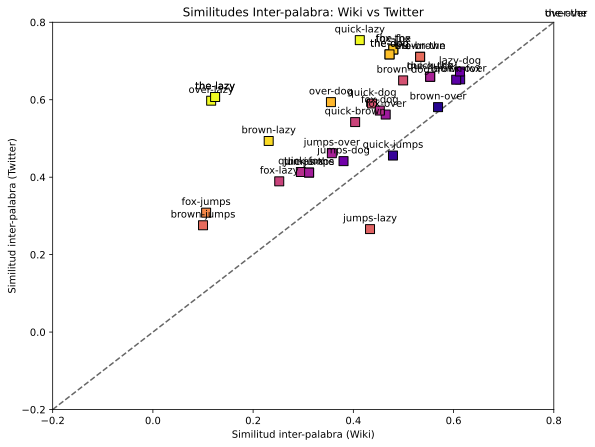

In [8]:
plt.figure(figsize=(9, 7))

# Iteramos sobre todos los pares de palabras únicos
for i in range(0, len(words)):
  for j in range(i+1, len(words)):

    # Saltar si es la misma palabra (aunque el loop ya lo evita, es buena seguridad)
    if words[i] == words[j]: continue

    # Calcular similitud coseno en ambos modelos
    cs_wiki = wiki.similarity(words[i], words[j])
    cs_twit = twit.similarity(words[i], words[j])

    # Calcular distancia a la línea de unidad (diferencia entre modelos)
    # Matemáticamente: distancia de un punto (cs_wiki, cs_twit) a la recta x=y
    v = np.array([cs_wiki, cs_twit])
    u = np.array([1, 1]) # Vector director de la recta identidad
    # Proyección ortogonal para hallar distancia
    dist = np.linalg.norm(v - (np.dot(v, u) / np.linalg.norm(u)**2) * u)

    # Dibujar el punto
    plt.plot(cs_wiki, cs_twit, 'ks', markersize=9, markerfacecolor=mpl.cm.plasma(dist*5))

    # Escribir el par de palabras
    plt.text(cs_wiki, cs_twit+.02, f'{words[i]}-{words[j]}', ha='center')

# Dibujar la línea de identidad (donde Wiki == Twitter)
xylims = [-.2, .8] # Ajustado según rangos típicos de similitud
plt.plot(xylims, xylims, '--', color=[.4, .4, .4], zorder=-30)

# Ajustes finales
plt.gca().set(xlim=xylims, ylim=xylims,
              xlabel='Similitud inter-palabra (Wiki)',
              ylabel='Similitud inter-palabra (Twitter)',
              title='Similitudes Inter-palabra: Wiki vs Twitter')
plt.show()

# Conclusiones del Experimento Comparativo

Al contrastar los modelos entrenados en **Wikipedia** (texto formal, enciclopédico) frente a **Twitter** (texto informal, conversacional), hemos descubierto principios fundamentales sobre cómo aprenden las máquinas:

### 1. El Significado es Estadístico, no Absoluto
En el ejercicio de la palabra "battery" (batería), es probable que hayas notado diferencias sutiles pero importantes:
* **Wikipedia:** Tiende a asociarla con términos de física, energía, celdas o química (`voltage`, `cell`, `electric`).
* **Twitter:** Tiende a asociarla con el uso cotidiano, teléfonos móviles o estados de ánimo (`phone`, `died`, `charging`).
* **Lección:** La IA no sabe qué es una batería en el mundo real; solo sabe en qué contextos aparece la palabra con más frecuencia.

### 2. La Robustez de las Relaciones Físicas
Al comparar `table` (mesa) y `chair` (silla), la similitud fue alta en ambos modelos.
* Esto ocurre porque, independientemente de si escribes un artículo académico o un tuit, las mesas y las sillas suelen mencionarse juntas. Las relaciones semánticas fuertes trascienden el estilo del lenguaje.

### 3. La Diagonal de la Verdad (Gráfico Final)
En el gráfico de dispersión "The quick brown fox...", la línea punteada diagonal ($x=y$) representa el acuerdo perfecto entre ambos modelos.
* **Puntos sobre la línea:** Pares de palabras donde Wikipedia y Twitter "piensan" igual (ej. probablemente `brown`-`fox` tienen una relación estable).
* **Puntos lejos de la línea (Colores cálidos):** Pares donde hay desacuerdo. Esto suele ocurrir con palabras polisémicas (palabras con múltiples significados) o jerga. Por ejemplo, `quick` (rápido) en un contexto deportivo/Twitter podría tener connotaciones diferentes a un contexto descriptivo/Wiki.

### Conclusión General
No existe un "mejor" modelo de embeddings universal.
* Si vas a analizar documentos legales o noticias, usa **GloVe-Wiki** o **Word2Vec-GoogleNews**.
* Si vas a analizar opiniones de clientes, chats o redes sociales, **GloVe-Twitter** funcionará mucho mejor porque entiende la jerga, las abreviaciones y el contexto informal.